In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np 

In [3]:
%matplotlib notebook

In [4]:
from scipy.stats import logistic

In [5]:
import h5py

In [6]:
import os

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
cwd = os.getcwd() 
path = os.path.join(cwd,'data') 

In [9]:
def load_dataset():
    fn = os.path.join(path , 'train_signs.h5')
    train_dataset = h5py.File(fn, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) 
    y_train = np.array(train_dataset["train_set_y"][:]) 
    fn = os.path.join(path , 'test_signs.h5')
    test_dataset =  h5py.File(fn, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) 
    y_test = np.array(test_dataset["test_set_y"][:]) 
    classes = np.array(test_dataset["list_classes"][:])
    y_train = y_train.reshape((1, y_train.shape[0]))
    y_test = y_test.reshape((1, y_test.shape[0]))
    return X_train, y_train, X_test, y_test, classes

In [10]:
# завантаження датасету
X_train, y_train, X_test, y_test, classes = load_dataset()

# розділення на y_train і y_test
y_train = y_train.ravel()
y_test = y_test.ravel()

# розділення даних на навчальні та тестові
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# нормалізація даних
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(X_train.shape[0], -1))
X_test_scaled = scaler.transform(X_test.reshape(X_test.shape[0], -1))

print ('X_train.shape =', X_train.shape)
print ('X_test.shape =', X_test.shape)
print ('y_train.shape =', y_train.shape)
print ('y_test.shape =', y_test.shape)

X_train.shape = (864, 64, 64, 3)
X_test.shape = (216, 64, 64, 3)
y_train.shape = (864,)
y_test.shape = (216,)


In [11]:
def display_samples_in_grid(X, n_rows, n_cols=None, y=None):
    if n_cols is None: 
        n_cols = n_rows
    indices = np.random.randint(0, len(X), n_rows * n_cols)
    for i in range(n_rows): 
        for j in range(n_cols):
            index = n_rows * i + j           
            ax = plt.subplot(n_rows, n_cols, index + 1) 
            plt.imshow(X[indices[index]])
            if not (y is None):
                plt.title(y[indices[index]])
            plt.axis('off')

    plt.tight_layout(h_pad=1)

<IPython.core.display.Javascript object>


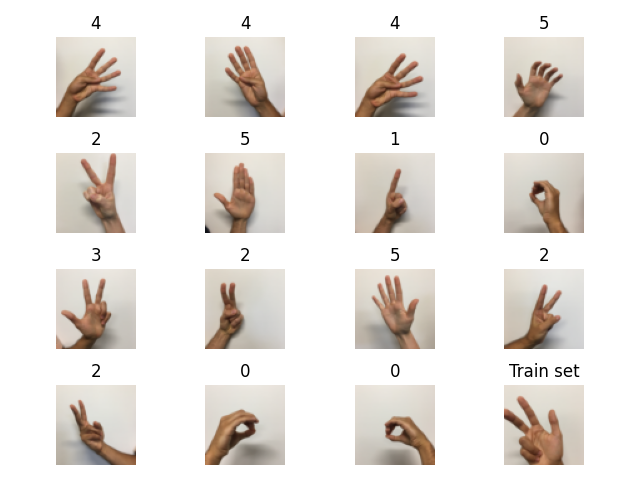

In [12]:
plt.figure()
display_samples_in_grid(X_train, n_rows=4, y=y_train)

In [13]:
plt.title('Train set')

Text(0.5, 1.0, 'Train set')

In [32]:
from sklearn.svm import SVC
clf = SVC(C=10, kernel='rbf', gamma=0.001).fit(X_train_scaled, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train_scaled, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test_scaled, y_test)))

train accuracy= 100.000%
test accuracy= 49.074%


In [14]:
import tensorflow as tf


In [15]:
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [16]:
earlystop = EarlyStopping(monitor='val_accuracy', patience=10)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    tf.keras.layers.Dense(100, activation='tanh', kernel_regularizer=l2(0.01))
])
model_1.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
history_1 = model_1.fit(X_train, y_train,
                        validation_data=(X_test, y_test),
                        epochs=100,
                        verbose=1,
                        callbacks=[earlystop, checkpoint],
                        shuffle=True)
test_loss, test_acc1 = model_1.evaluate(X_test, y_test)


Epoch 1/100
27/27 [==============================] - 2s 49ms/step - loss: 17.6538 - accuracy: 0.0938 - val_loss: 15.2860 - val_accuracy: 0.1574
Epoch 2/100
27/27 [==============================] - 1s 31ms/step - loss: 15.5252 - accuracy: 0.1690 - val_loss: 12.9906 - val_accuracy: 0.1574
Epoch 3/100
27/27 [==============================] - 1s 32ms/step - loss: 13.0352 - accuracy: 0.1690 - val_loss: 12.4410 - val_accuracy: 0.1574
Epoch 4/100
27/27 [==============================] - 1s 36ms/step - loss: 14.1107 - accuracy: 0.1690 - val_loss: 14.8982 - val_accuracy: 0.1574
Epoch 5/100
27/27 [==============================] - 1s 32ms/step - loss: 14.3471 - accuracy: 0.1690 - val_loss: 14.2046 - val_accuracy: 0.1574
Epoch 6/100
27/27 [==============================] - 1s 33ms/step - loss: 14.0269 - accuracy: 0.1690 - val_loss: 14.2112 - val_accuracy: 0.1574
Epoch 7/100
27/27 [==============================] - 1s 34ms/step - loss: 14.0308 - accuracy: 0.1690 - val_loss: 14.2085 - val_accuracy:

In [17]:
# Виводимо найкращу точність та номер епохи
best_epoch = history_1.history['val_accuracy'].index(max(history_1.history['val_accuracy'])) + 1
best_val_accuracy = max(history_1.history['val_accuracy'])

print(f"Найкраща епоха у навчанні: {best_val_accuracy:.4f} в епоху {best_epoch}")
print("Точність першої моделі на тестових даних: {:.3f}".format(test_acc1))

print("Одношарова модель:")
print("Остання точність навчання: {:.2f}%".format(history_1.history['accuracy'][-1] * 100))
print("Остання точність перевірки: {:.2f}%".format(history_1.history['val_accuracy'][-1] * 100))

Найкраща епоха у навчанні: 0.1574 в епоху 1
Точність першої моделі на тестових даних: 0.157
Одношарова модель:
Остання точність навчання: 16.90%
Остання точність перевірки: 15.74%


In [23]:
earlystop = EarlyStopping(monitor='val_accuracy', patience=10)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    tf.keras.layers.Dense(6, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(6, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))
])
model_2.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
history_2 = model_2.fit(X_train, y_train,
                        validation_data=(X_test, y_test),
                        epochs=100,
                        verbose=1,
                        callbacks=[earlystop, checkpoint],
                        shuffle=True)
test_loss, test_acc2 = model_2.evaluate(X_test, y_test)

Epoch 1/100
27/27 [==============================] - 1s 18ms/step - loss: 10.5481 - accuracy: 0.1667 - val_loss: 10.8649 - val_accuracy: 0.1713
Epoch 2/100
27/27 [==============================] - 0s 8ms/step - loss: 10.5402 - accuracy: 0.1701 - val_loss: 6.1934 - val_accuracy: 0.1944
Epoch 3/100
27/27 [==============================] - 0s 7ms/step - loss: 8.0774 - accuracy: 0.1701 - val_loss: 10.6597 - val_accuracy: 0.1713
Epoch 4/100
27/27 [==============================] - 0s 7ms/step - loss: 9.9908 - accuracy: 0.1713 - val_loss: 1.8903 - val_accuracy: 0.1759
Epoch 5/100
27/27 [==============================] - 0s 7ms/step - loss: 1.8938 - accuracy: 0.1644 - val_loss: 1.8947 - val_accuracy: 0.1759
Epoch 6/100
27/27 [==============================] - 0s 7ms/step - loss: 2.0142 - accuracy: 0.1620 - val_loss: 1.9007 - val_accuracy: 0.1759
Epoch 7/100
27/27 [==============================] - 0s 7ms/step - loss: 1.9056 - accuracy: 0.1644 - val_loss: 1.9075 - val_accuracy: 0.1759
Epoch 8/

In [25]:

best_epoch = history_2.history['val_accuracy'].index(max(history_2.history['val_accuracy'])) + 1
best_val_accuracy = max(history_2.history['val_accuracy'])

print(f"Найкраща епоха у навчанні: {best_val_accuracy:.4f} в епоху {best_epoch}")
print("Точність 2 моделі на тестових даних: {:.3f}".format(test_acc2))

print("Одношарова модель:")
print("Остання точність навчання: {:.2f}%".format(history_2.history['accuracy'][-1] * 100))
print("Остання точність перевірки: {:.2f}%".format(history_2.history['val_accuracy'][-1] * 100))

Найкраща епоха у навчанні: 0.1944 в епоху 2
Точність 2 моделі на тестових даних: 0.176
Одношарова модель:
Остання точність навчання: 16.44%
Остання точність перевірки: 17.59%


In [29]:
earlystop = EarlyStopping(monitor='val_accuracy', patience=100)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    tf.keras.layers.Dense(20, activation='tanh', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(7, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.01))
])
model_3.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
history_3 = model_3.fit(X_train, y_train,
                        validation_data=(X_test, y_test),
                        epochs=100,
                        verbose=1,
                        callbacks=[earlystop, checkpoint],
                        shuffle=True)
test_loss, test_acc3 = model_3.evaluate(X_test, y_test)


Epoch 1/100
27/27 [==============================] - 2s 25ms/step - loss: 8.1239 - accuracy: 0.1644 - val_loss: 10.3756 - val_accuracy: 0.1574
Epoch 2/100
27/27 [==============================] - 0s 11ms/step - loss: 6.2234 - accuracy: 0.1562 - val_loss: 6.1146 - val_accuracy: 0.1713
Epoch 3/100
27/27 [==============================] - 0s 9ms/step - loss: 5.7599 - accuracy: 0.1725 - val_loss: 6.0331 - val_accuracy: 0.1250
Epoch 4/100
27/27 [==============================] - 0s 9ms/step - loss: 5.8002 - accuracy: 0.1852 - val_loss: 6.3234 - val_accuracy: 0.1250
Epoch 5/100
27/27 [==============================] - 0s 9ms/step - loss: 5.8963 - accuracy: 0.1771 - val_loss: 6.0647 - val_accuracy: 0.1250
Epoch 6/100
27/27 [==============================] - 0s 10ms/step - loss: 4.6558 - accuracy: 0.1701 - val_loss: 4.4581 - val_accuracy: 0.1574
Epoch 7/100
27/27 [==============================] - 0s 10ms/step - loss: 4.2320 - accuracy: 0.1690 - val_loss: 4.3607 - val_accuracy: 0.1574
Epoch 8/

27/27 [==============================] - 0s 10ms/step - loss: 2.4333 - accuracy: 0.1644 - val_loss: 2.4327 - val_accuracy: 0.1759
Epoch 59/100
27/27 [==============================] - 0s 9ms/step - loss: 2.4321 - accuracy: 0.1644 - val_loss: 2.4314 - val_accuracy: 0.1759
Epoch 60/100
27/27 [==============================] - 0s 10ms/step - loss: 2.4308 - accuracy: 0.1644 - val_loss: 2.4302 - val_accuracy: 0.1759
Epoch 61/100
27/27 [==============================] - 0s 9ms/step - loss: 2.4297 - accuracy: 0.1644 - val_loss: 2.4290 - val_accuracy: 0.1759
Epoch 62/100
27/27 [==============================] - 0s 10ms/step - loss: 2.4285 - accuracy: 0.1644 - val_loss: 2.4279 - val_accuracy: 0.1759
Epoch 63/100
27/27 [==============================] - 0s 9ms/step - loss: 2.4273 - accuracy: 0.1644 - val_loss: 2.4267 - val_accuracy: 0.1759
Epoch 64/100
27/27 [==============================] - 0s 10ms/step - loss: 2.4262 - accuracy: 0.1644 - val_loss: 2.4256 - val_accuracy: 0.1759
Epoch 65/100
27

In [30]:
best_epoch = history_3.history['val_accuracy'].index(max(history_3.history['val_accuracy'])) + 1
best_val_accuracy = max(history_3.history['val_accuracy'])

print(f"Найкраща епоха у навчанні: {best_val_accuracy:.4f} в епоху {best_epoch}")
print("Точність 3 моделі на тестових даних: {:.3f}".format(test_acc3))

print("Одношарова модель:")
print("Остання точність навчання: {:.2f}%".format(history_3.history['accuracy'][-1] * 100))
print("Остання точність перевірки: {:.2f}%".format(history_3.history['val_accuracy'][-1] * 100))

Найкраща епоха у навчанні: 0.1944 в епоху 15
Точність 3 моделі на тестових даних: 0.176
Одношарова модель:
Остання точність навчання: 16.44%
Остання точність перевірки: 17.59%


In [31]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

<IPython.core.display.Javascript object>


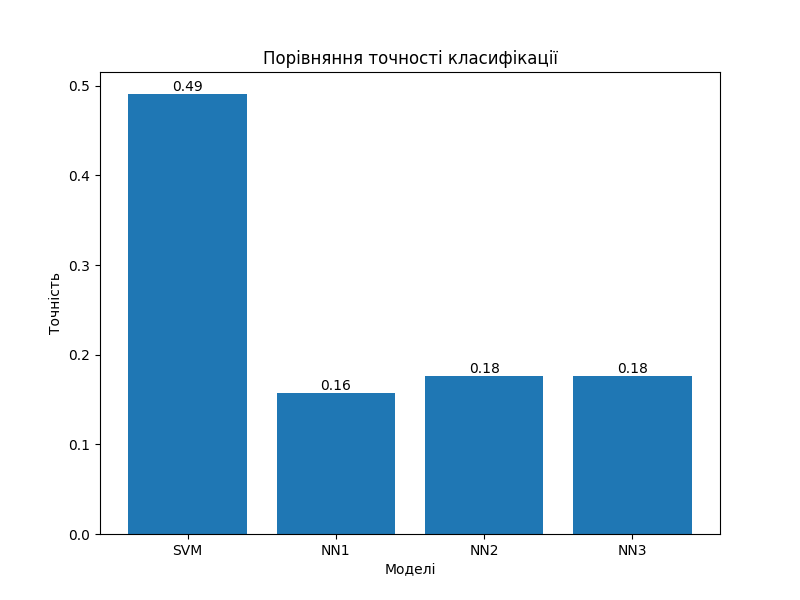

In [33]:
fig = plt.figure(figsize=(8, 6))

In [34]:
# Точність SVM
svm_acc = clf.score(X_test_scaled, y_test)

# Точності трьох нейронних мереж
nn_accs = [test_acc1, test_acc2, test_acc3]

# Мітки для вісі x
labels = ['SVM', 'NN1', 'NN2', 'NN3']

In [35]:
# Додаємо до графіку стовпчики з точностями
plt.bar(labels, [svm_acc] + nn_accs)

<BarContainer object of 4 artists>

In [36]:
plt.annotate(f'{svm_acc:.2f}', xy=(0, svm_acc), ha='center', va='bottom')
for i, acc in enumerate(nn_accs):
    plt.annotate(f'{acc:.2f}', xy=(i+1, acc), ha='center', va='bottom')


In [37]:
# Додаємо заголовок та підписи вісей
plt.title('Порівняння точності класифікації')
plt.xlabel('Моделі')
plt.ylabel('Точність')


Text(0, 0.5, 'Точність')